*import libraries*

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import (precision_score, recall_score, confusion_matrix, classification_report, roc_curve,precision_recall_curve)


## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with pandas 

 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [3]:
df = pd.read_csv('./insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Observation 
---
- **Exploratory Data Analysis (EDA)**

- *`let's have a look on the columns and their data types using detailed info function`*

- check the null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Observations**
---
-  There are 1338 rows and 7 columns in the dataset

-  The 4 columns are in numeric data types and 3 columns are in object data types

-  The columns in the datasets are:
   - `'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'`

-  There are some missing values in the dataset which we will read in details and deal later on in the notebook.

-  And just one record is duplicated in the dataset.


In [18]:
df = df.drop_duplicates()

## Observation
---
- There is no duplicates values now 

- Let's start to visualize the distribution of dataset 

- we use **histogram** and **pairplot** to visualize the distribution of data   

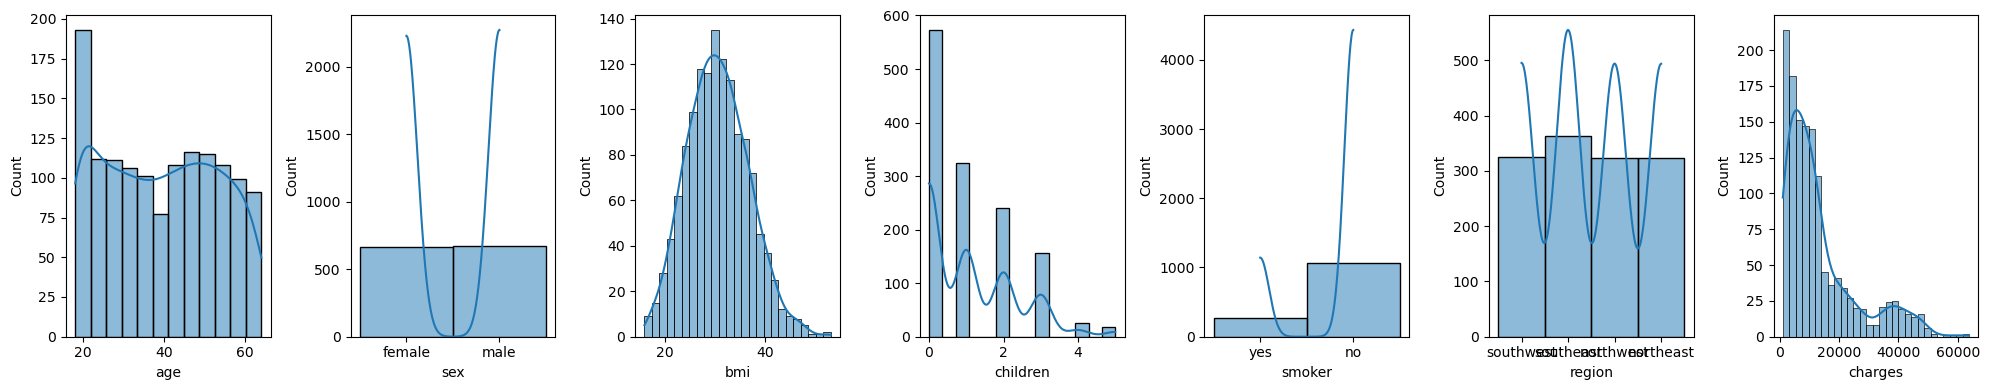

In [26]:
plt.figure(figsize=(20, 4))

total_col = len(df.columns)

for idx, col in enumerate(df.columns):
    plt.subplot(1, total_col, idx+1)
    sns.histplot(df[col], kde= True)
    plt.tight_layout()
    
plt.show()    

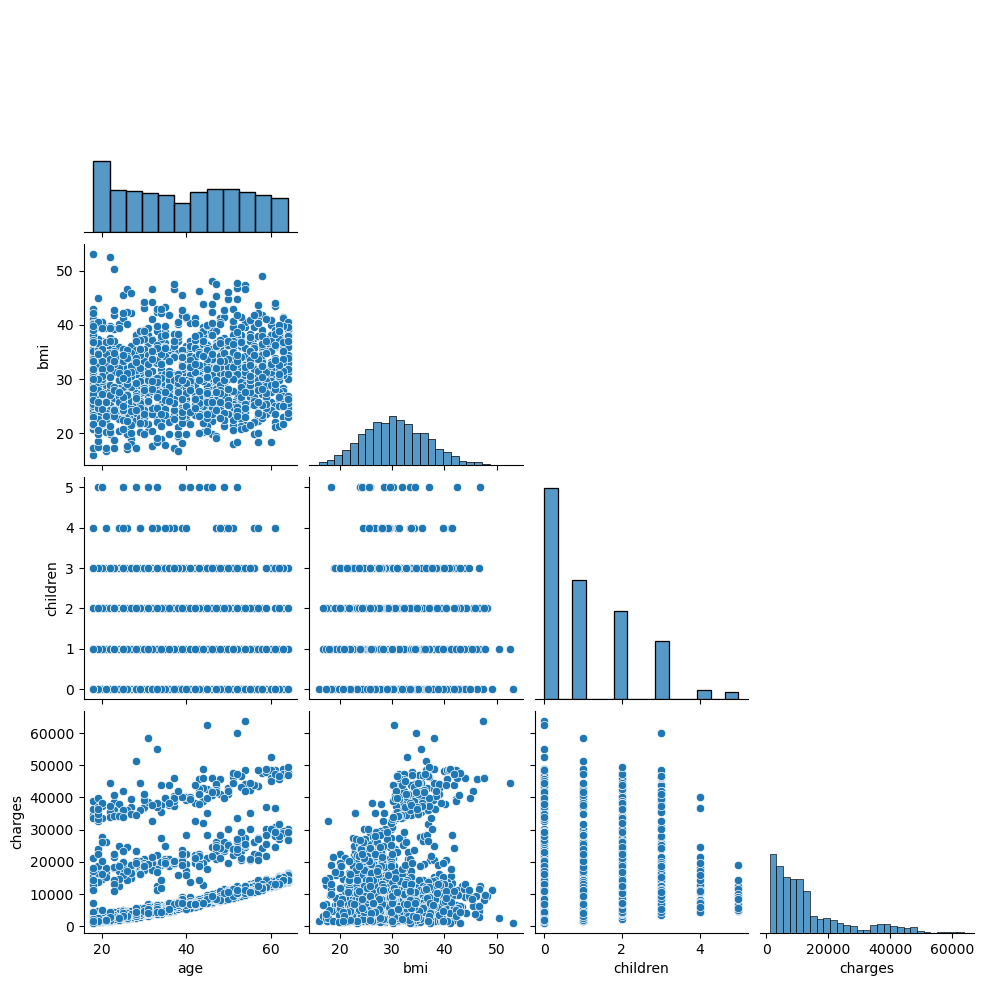

In [27]:
sns.pairplot(df, corner= True)
plt.show()

## Observation
---
- As you see the distribution of data , it seems to be a normal distribution.

- So we need to more exploration of data to confirm this distribution.
  
- we can use sunburst plot to visualize the data 

In [30]:
df_sunburst = df.groupby(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']).size().reset_index(name='counts')

fig = px.sunburst(df_sunburst, path=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] ,values='counts')
fig.show()

## Observation
---
- Clearly we can see every record in this plot 

- so not need to be more explore the data to visualize the distribution of data 

- Let's check the different features that impact  on target

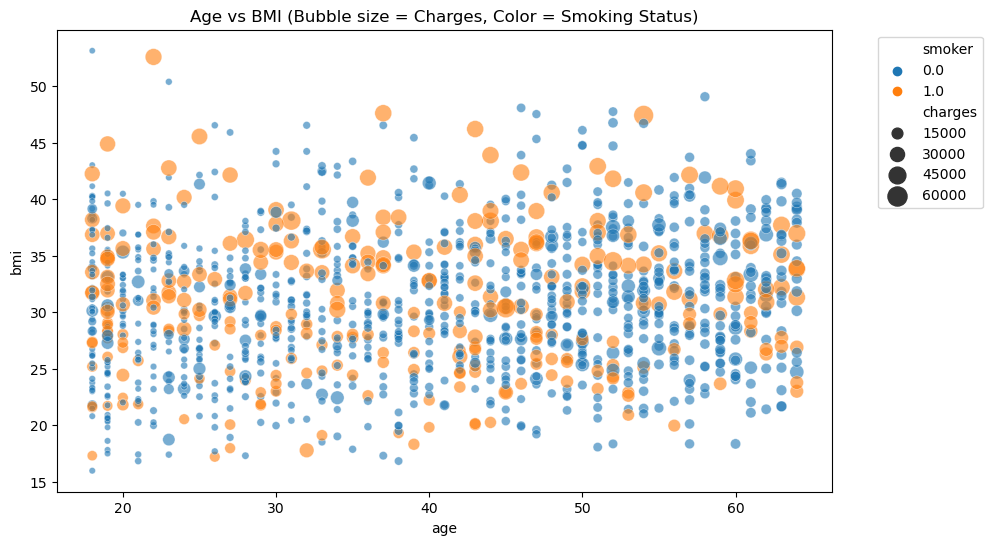

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bmi', size='charges', hue='smoker', sizes=(20, 200), alpha=0.6)
plt.title('Age vs BMI (Bubble size = Charges, Color = Smoking Status)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- Helps observe whether higher BMI is associated with higher charges.

- Color-coded by smoking status to see differences clearly.

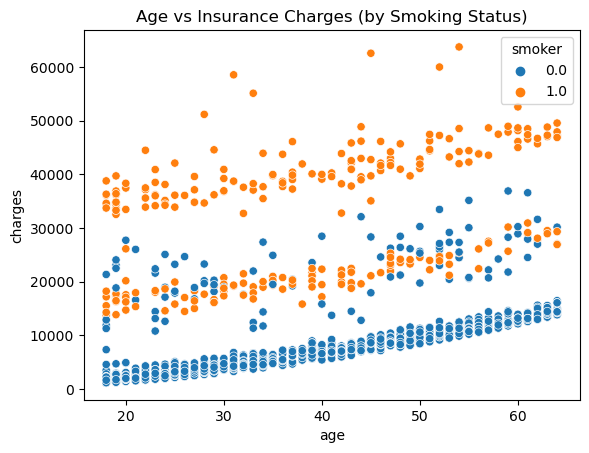

In [122]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Insurance Charges (by Smoking Status)')
plt.show()

- Shows how charges increase with age.

- Smokers may show a steeper increase.

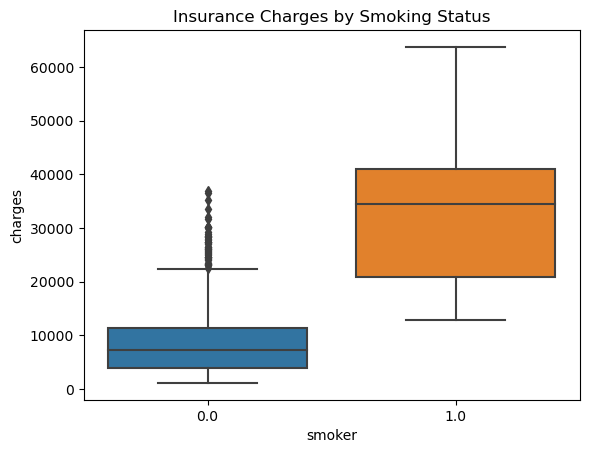

In [123]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Insurance Charges by Smoking Status')
plt.show()

- Smokers usually have significantly higher charges.

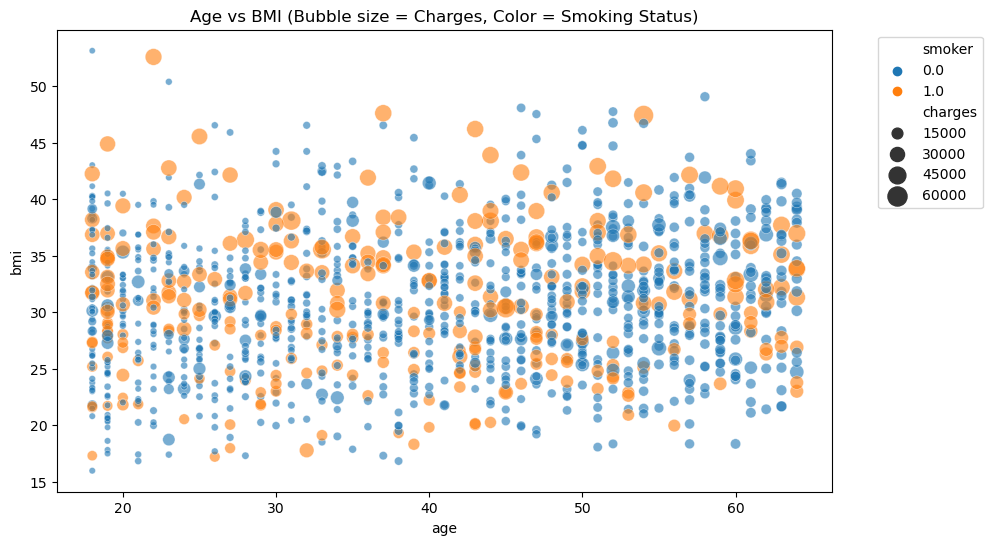

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bmi', size='charges', hue='smoker', sizes=(20, 200), alpha=0.6)
plt.title('Age vs BMI (Bubble size = Charges, Color = Smoking Status)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- You can see how charges (bubble size) change based on both BMI and age
- And how smoking status shifts those effects.

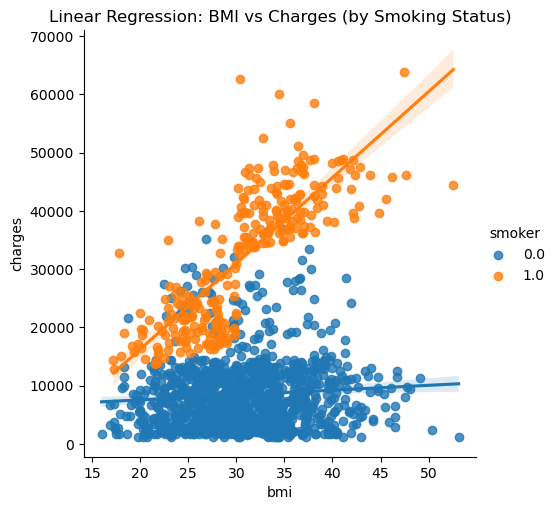

In [125]:
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Linear Regression: BMI vs Charges (by Smoking Status)')
plt.show()

## Observation
---
- You can see know more clearly how **BMI** impact on charges

- Let's move on the next step to check  the  outlier of the data 

- And **transform** the **categorical** data into **numerical** data to use in the model.

In [38]:
df_cat = [col for col in df.columns if df[col].dtype == 'object']
df[df_cat]= OrdinalEncoder().fit_transform(df[df_cat])
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.90,0,1.0,3.0,16884.9240
1,18,1.0,33.77,1,0.0,2.0,1725.5523
2,28,1.0,33.00,3,0.0,2.0,4449.4620


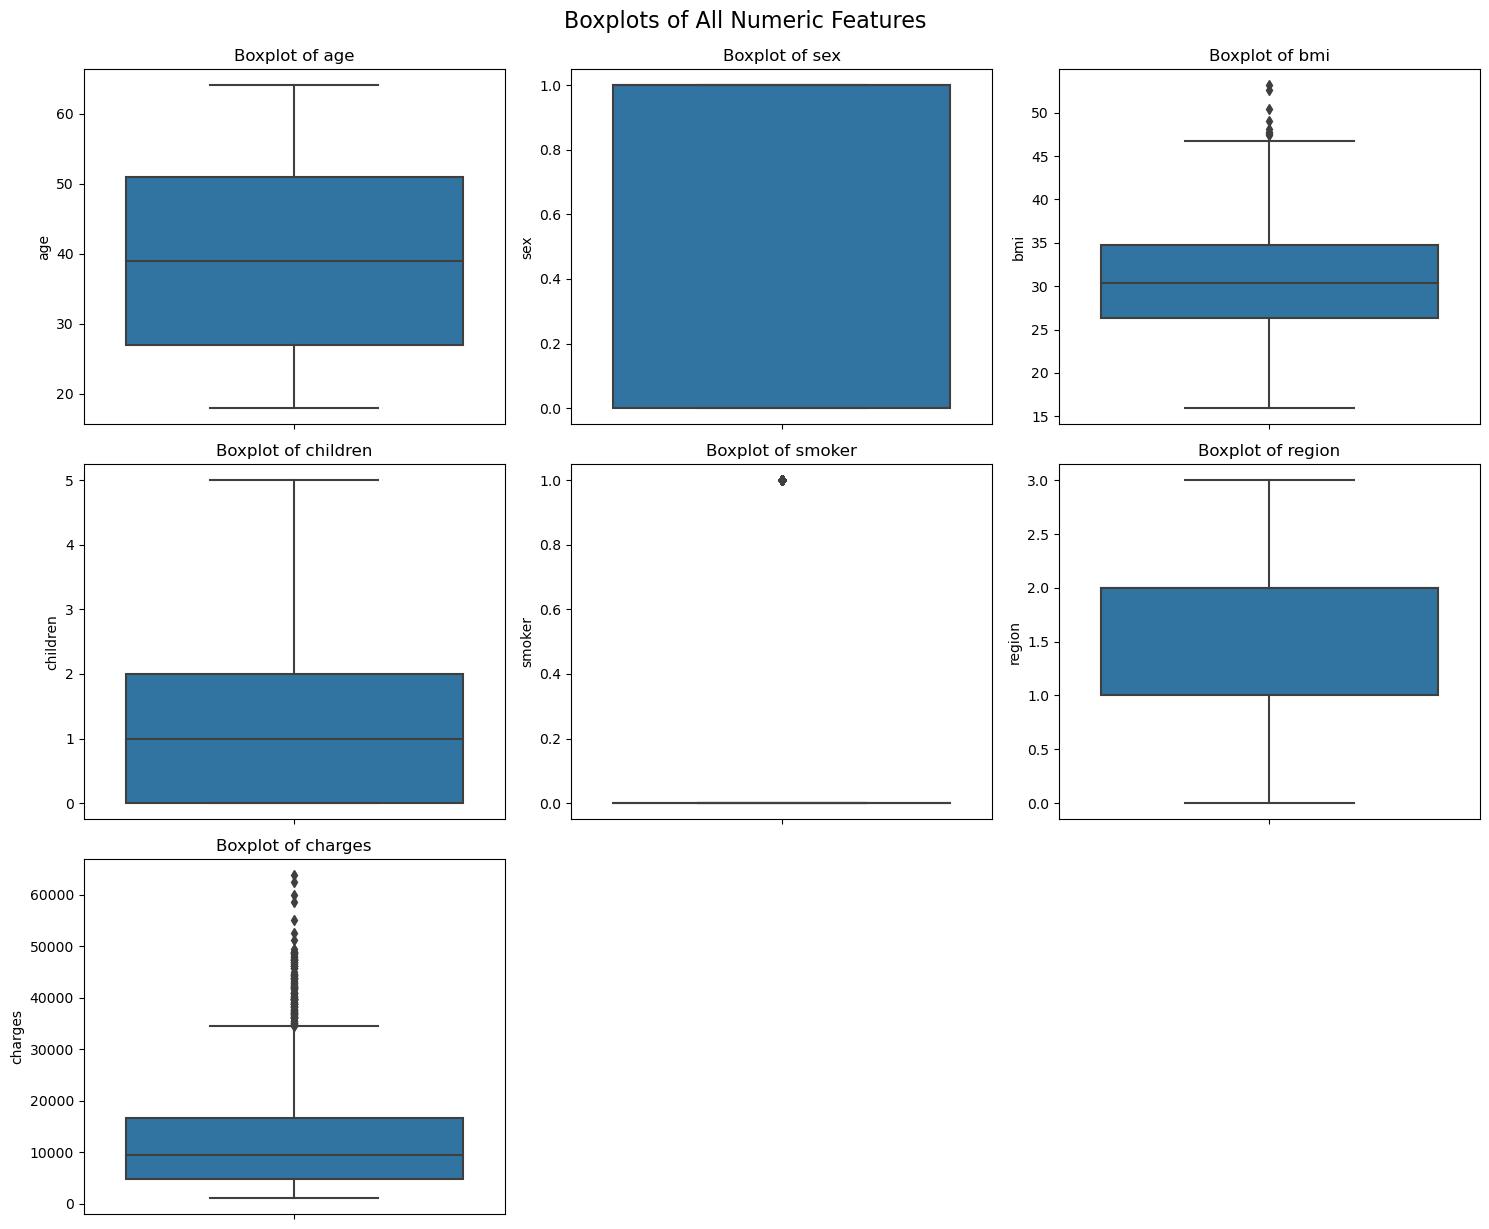

In [50]:
total_col = len(df.columns)
cols = 3  
rows = (total_col + cols - 1) // cols  
plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])  
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle("Boxplots of All Numeric Features", fontsize=16, y=1.02)
plt.show()

## Observation
---
- As we can see the data , we have some outlier in our target column 

- No need to remove bcz this data is a health data of persons , so can be a hug amount of charges in this data 

- Let's see the correlation between the features and target variable

- But before to check correlation between features and target variable

- Let's split the target variable 



In [53]:
X = df.drop(columns=['charges'])
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [54]:
numerical_features_with_target = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr() 

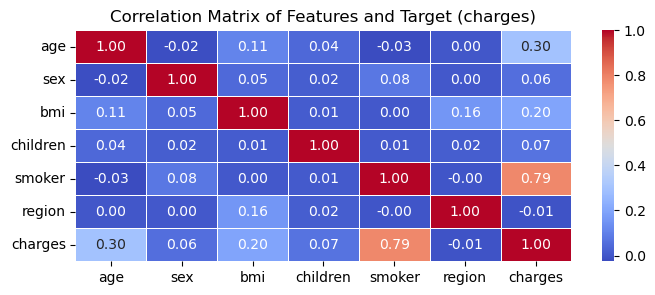

In [59]:
plt.figure(figsize= (8, 3))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features and Target (charges)")
plt.show()

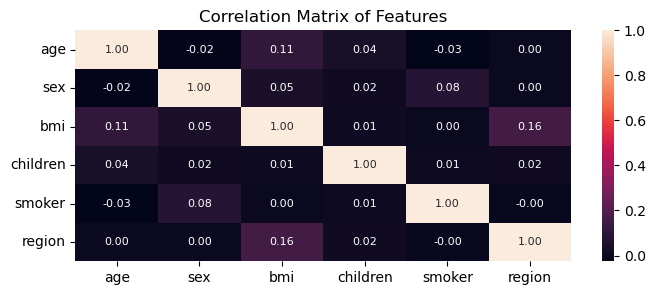

In [60]:
corr_overall = X.corr()

plt.figure(figsize=(8,3))

a = sns.heatmap(corr_overall, annot=True, annot_kws={"size": 8}, fmt='.2f')
plt.title('Correlation Matrix of Features')
rotx = a.set_xticklabels(a.get_xticklabels(), fontsize=10)
roty = a.set_yticklabels(a.get_yticklabels(), fontsize=10)

## Observation
---
-  some features are strictly correlate with target variables  

- split  the data to train the **Machine Learning ** Model 


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size=0.2)

- Let's train the **linear regression** model

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)

print('Linear Regression Model Performance')
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Linear Regression Model Performance
Mean Squared Error (MSE): 37069205.58
Mean Absolute Error (MAE): 4153.00
Root Mean Squared Error:6088.45
R² Score: 0.74


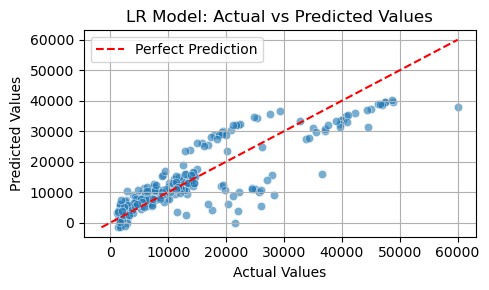

In [134]:
# visualize
plt.figure(figsize= (5,3) )
sns.scatterplot(x= y_test, y= y_predict, alpha= 0.6)

# plot the 45-degree line for perfect prediction
max_val = max(max(y_test), max(y_predict))
min_val = min(min(y_test), min(y_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("LR Model: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Observation
---
- Clearly can see the perfect prediction of **Linear regression** model 

- we need to use an  other model to make the predictions 

- Let's use to **Decision Tree Regressor** Model

In [135]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)


print('Decision Tree Regressor Performance')
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Decision Tree Regressor Performance
Mean Squared Error (MSE): 51643931.79
Mean Absolute Error (MAE): 3605.81
Root Mean Squared Error:7186.37
R² Score: 0.64


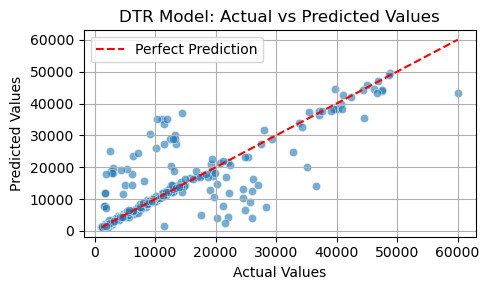

In [136]:
# visualize

plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test, y=y_predict, alpha=0.6)

# Plot the 45-degree line for perfect predictions
max_val = max(max(y_test), max(y_predict))
min_val = min(min(y_test), min(y_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("DTR Model: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [137]:
RFR_model = RandomForestRegressor()
RFR_model.fit(X_train, y_train)

y_predict = RFR_model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)

print('Random Forest Regressor Performance:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f"Root Mean Squared Error:{rmse:.2f}")
print(f'R² Score: {r2:.2f}')

Random Forest Regressor Performance:
Mean Squared Error (MSE): 23819217.95
Mean Absolute Error (MAE): 2874.34
Root Mean Squared Error:4880.49
R² Score: 0.84


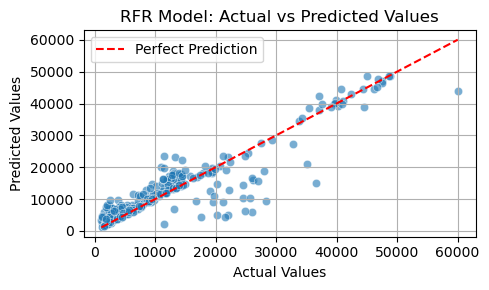

In [138]:
# visualize

plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test, y=y_predict, alpha=0.6)

# Plot the 45-degree line for perfect predictions
max_val = max(max(y_test), max(y_predict))
min_val = min(min(y_test), min(y_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("RFR Model: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [139]:
ETR_model = ExtraTreesRegressor()
ETR_model.fit(X_train, y_train)

y_pred_ETR = ETR_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ETR)
mae = mean_absolute_error(y_test, y_pred_ETR)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_pred_ETR)

print('Extra Trees Regressor Performance:')
print(f'Mean Squared Error (MSE): {mse: .2f}')
print(f'Mean Absolute Error (MAE): {mae: .2f}')
print(f"Root Mean Squared Error:{rmse:.2f}")
print(f'R² Score: {r2:.2f}')

Extra Trees Regressor Performance:
Mean Squared Error (MSE):  28958860.83
Mean Absolute Error (MAE):  2978.66
Root Mean Squared Error:4880.49
R² Score: 0.80


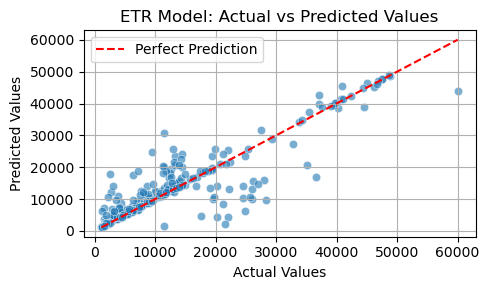

In [140]:
# visualize

plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test, y=y_pred_ETR, alpha=0.6)

# Plot the 45-degree line for perfect predictions
max_val = max(max(y_test), max(y_pred_ETR))
min_val = min(min(y_test), min(y_pred_ETR))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ETR Model: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()